In [1346]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler , StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report ,ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

In [1406]:
df=pd.read_csv("C:\\Users\\Berke\\Desktop\\veri_bilimi_ödev\\train_odev.csv")

In [1374]:
print("Veri Seti Özeti:")
print(df.describe())

Veri Seti Özeti:
           battery         blue        speed     dual_sim      fcamera  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean   1239.906667     0.507500     1.492500     0.508333     4.365833   
std     442.722035     0.500152     0.821212     0.500139     4.355204   
min     501.000000     0.000000     0.500000     0.000000     0.000000   
25%     845.500000     0.000000     0.600000     0.000000     1.000000   
50%    1231.500000     1.000000     1.400000     1.000000     3.000000   
75%    1619.250000     1.000000     2.200000     1.000000     7.000000   
max    1998.000000     1.000000     3.000000     1.000000    19.000000   

                g4       memory       pdepth      pweight        cores  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.527500    31.765000     0.501167   140.223333     4.489167   
std       0.499451    17.920307     0.285861    35.596878     2.277617   
min       0.000000  

In [968]:
print("\nİlk 5 Satır:")
print(df.head())


İlk 5 Satır:
   battery  blue  speed  dual_sim  fcamera  g4  memory  pdepth  pweight  \
0      842     0    2.2         0        1   0       7     0.6      188   
1     1021     1    0.5         1        0   1      53     0.7      136   
2      563     1    0.5         1        2   1      41     0.9      145   
3      615     1    2.5         0        0   0      10     0.8      131   
4     1821     1    1.2         0       13   1      44     0.6      141   

   cores  pcamera  px_height  px_width  sheight  swidth  talk_time  g3  \
0      2        2         20       756        9       7         19   0   
1      3        6        905      1988       17       3          7   1   
2      5        6       1263      1716       11       2          9   1   
3      6        9       1216      1786       16       8         11   1   
4      2       14       1208      1212        8       2         15   1   

   touch_screen  wifi  price_range  
0             0     1            1  
1             1 

In [970]:
print("\nVeri Setinin Şekli (satır, sütun):")
print(df.shape)


Veri Setinin Şekli (satır, sütun):
(1200, 20)


In [972]:
print("\nVeri Tipleri:")
print(df.info())


Veri Tipleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   battery       1200 non-null   int64  
 1   blue          1200 non-null   int64  
 2   speed         1200 non-null   float64
 3   dual_sim      1200 non-null   int64  
 4   fcamera       1200 non-null   int64  
 5   g4            1200 non-null   int64  
 6   memory        1200 non-null   int64  
 7   pdepth        1200 non-null   float64
 8   pweight       1200 non-null   int64  
 9   cores         1200 non-null   int64  
 10  pcamera       1200 non-null   int64  
 11  px_height     1200 non-null   int64  
 12  px_width      1200 non-null   int64  
 13  sheight       1200 non-null   int64  
 14  swidth        1200 non-null   int64  
 15  talk_time     1200 non-null   int64  
 16  g3            1200 non-null   int64  
 17  touch_screen  1200 non-null   int64  
 18  wifi         

In [974]:
print("\nEksik Değerlerin Sayısı:")
print(df.isnull().sum())


Eksik Değerlerin Sayısı:
battery         0
blue            0
speed           0
dual_sim        0
fcamera         0
g4              0
memory          0
pdepth          0
pweight         0
cores           0
pcamera         0
px_height       0
px_width        0
sheight         0
swidth          0
talk_time       0
g3              0
touch_screen    0
wifi            0
price_range     0
dtype: int64


In [976]:
unique = df.nunique()
unique.to_frame().T

,battery,blue,speed,dual_sim,fcamera,g4,memory,pdepth,pweight,cores,pcamera,px_height,px_width,sheight,swidth,talk_time,g3,touch_screen,wifi,price_range
0,833,2,26,2,20,2,63,10,121,8,21,824,836,15,19,19,2,2,2,4


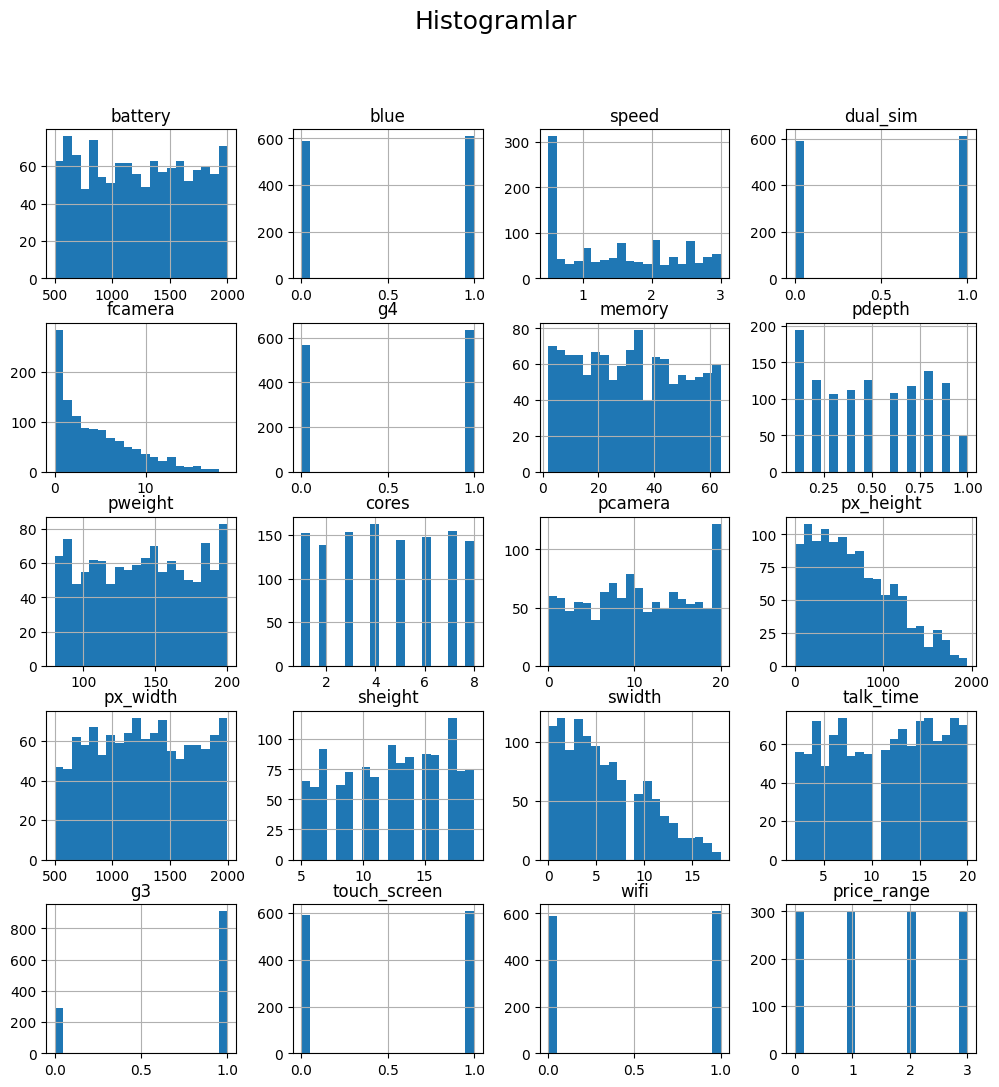

In [978]:
df.hist(bins=20,figsize=(12,12))
plt.suptitle("Histogramlar",size=18)
plt.show()

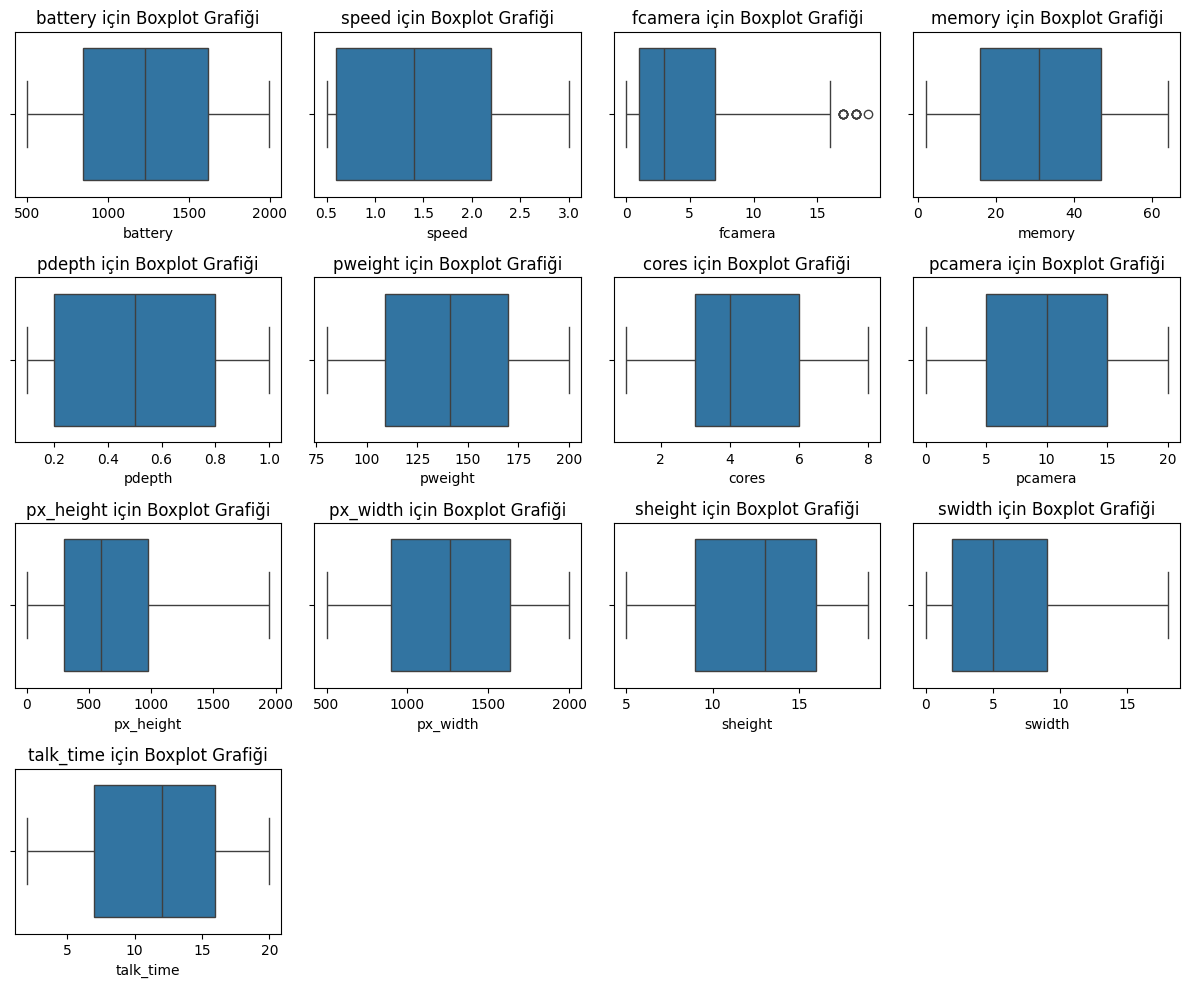

In [979]:
plt.figure(figsize=(12, 12))  
continuous_features = ['battery', 'speed', 'fcamera', 'memory', 'pdepth', 'pweight', 
                       'cores', 'pcamera', 'px_height', 'px_width', 'sheight', 'swidth', 'talk_time'] 


for i, column in enumerate(continuous_features, 1):  
    plt.subplot(5, 4, i)  
    sns.boxplot(data=df, x=column)  
    plt.title(f"{column} için Boxplot Grafiği")  

plt.tight_layout()  
plt.show()  

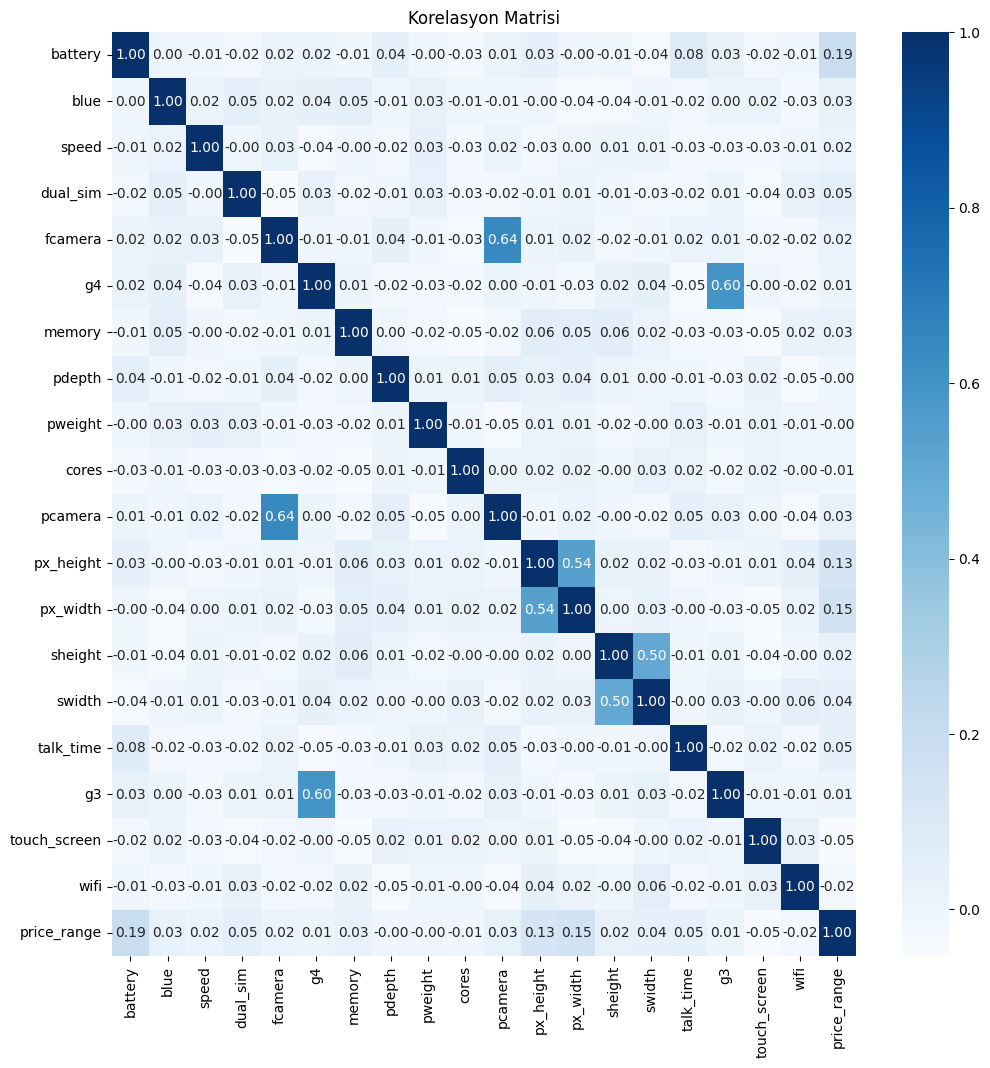

In [980]:
plt.figure(figsize=(12, 12)) 
correlation_matrix = df.select_dtypes(include=["number"]).corr()

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


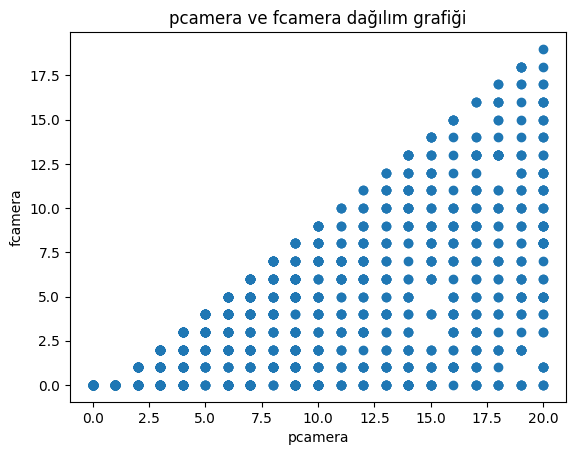

In [981]:
x=df["pcamera"]
y=df["fcamera"]

plt.scatter(x,y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f"{x.name} ve {y.name} dağılım grafiği")
plt.show()

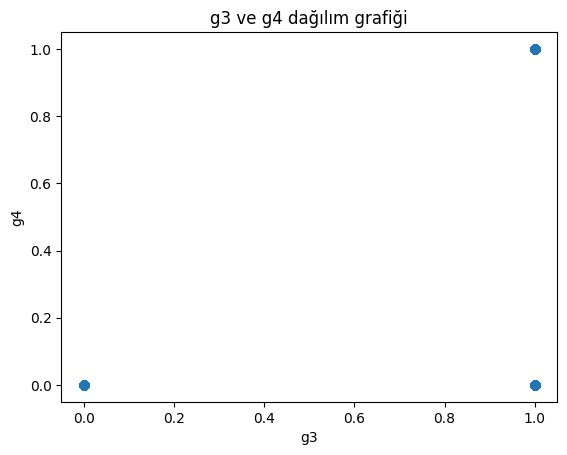

In [982]:
x=df["g3"]
y=df["g4"]

plt.scatter(x,y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f"{x.name} ve {y.name} dağılım grafiği")
plt.show()

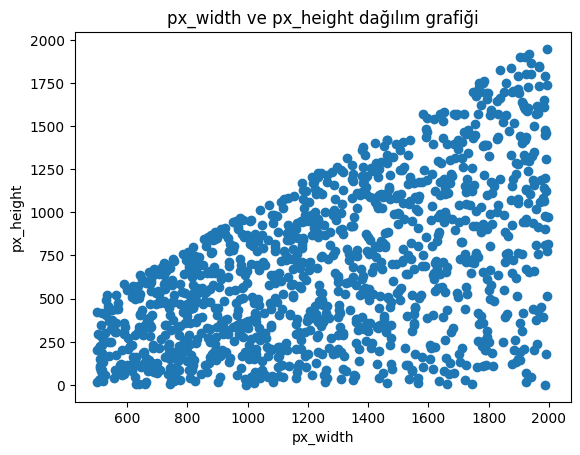

In [983]:
x=df["px_width"]
y=df["px_height"]

plt.scatter(x,y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f"{x.name} ve {y.name} dağılım grafiği")
plt.show()

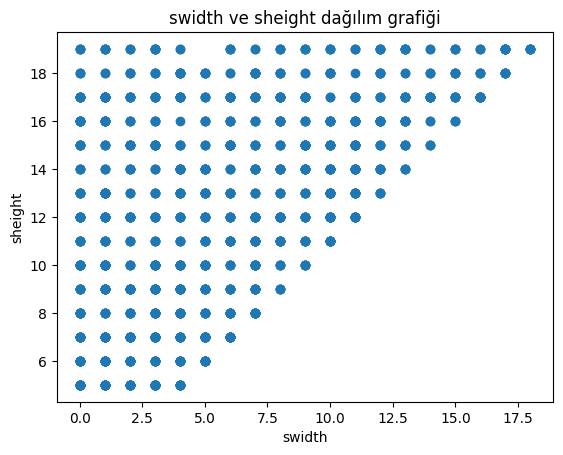

In [984]:
x=df["swidth"]
y=df["sheight"]

plt.scatter(x,y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f"{x.name} ve {y.name} dağılım grafiği")
plt.show()

In [1408]:
if "battery" in df.columns and "price_range" in df.columns:
    price_range = df["price_range"]
    df["battery_feature_2"]=((df["px_height"]*df["px_width"])/df["battery"]) *price_range

In [1412]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
    # 
        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
        
        num_outliers = outliers.sum()
        
        print(f"Sütun: {column}, Aykırı Değer Sayısı: {num_outliers}")

Sütun: battery, Aykırı Değer Sayısı: 0
Sütun: blue, Aykırı Değer Sayısı: 0
Sütun: speed, Aykırı Değer Sayısı: 0
Sütun: dual_sim, Aykırı Değer Sayısı: 0
Sütun: fcamera, Aykırı Değer Sayısı: 13
Sütun: g4, Aykırı Değer Sayısı: 0
Sütun: memory, Aykırı Değer Sayısı: 0
Sütun: pdepth, Aykırı Değer Sayısı: 0
Sütun: pweight, Aykırı Değer Sayısı: 0
Sütun: cores, Aykırı Değer Sayısı: 0
Sütun: pcamera, Aykırı Değer Sayısı: 0
Sütun: px_height, Aykırı Değer Sayısı: 0
Sütun: px_width, Aykırı Değer Sayısı: 0
Sütun: sheight, Aykırı Değer Sayısı: 0
Sütun: swidth, Aykırı Değer Sayısı: 0
Sütun: talk_time, Aykırı Değer Sayısı: 0
Sütun: g3, Aykırı Değer Sayısı: 290
Sütun: touch_screen, Aykırı Değer Sayısı: 0
Sütun: wifi, Aykırı Değer Sayısı: 0
Sütun: price_range, Aykırı Değer Sayısı: 0
Sütun: battery_feature_2, Aykırı Değer Sayısı: 86


In [1414]:
fcamera_lower_bound = 0
fcamera_upper_bound = 15
battery_lower_bound = 0
battery_upper_bound = 4000

columns = ['fcamera', 'battery_feature_2']
# columns = ['fcamera']


for col in columns:
    if col == 'fcamera':
        df[col] = df[col].apply(lambda x: fcamera_lower_bound if x < fcamera_lower_bound else (fcamera_upper_bound if x > fcamera_upper_bound else x))
    elif col == 'battery_feature_2':
        df[col] = df[col].apply(lambda x: battery_lower_bound if x < battery_lower_bound else (battery_upper_bound if x > battery_upper_bound else x))

In [1416]:
continuous_features = ['battery', 'speed', 'fcamera', 'memory', 'pdepth', 'pweight', 
                       'cores', 'pcamera', 'px_height', 'px_width', 'sheight', 'swidth', 'talk_time',"battery_feature_2"]

# 

scaler = MinMaxScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

df.head()

,battery,blue,speed,dual_sim,fcamera,g4,memory,pdepth,pweight,cores,...,px_height,px_width,sheight,swidth,talk_time,g3,touch_screen,wifi,price_range,battery_feature_2
0,0.227789,0,0.68,0,0.066667,0,0.080645,0.555556,0.900000,0.142857,...,0.010262,0.171009,0.285714,0.388889,0.944444,0,0,1,1,0.004489
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,...,0.464341,0.993988,0.857143,0.166667,0.277778,1,1,0,2,0.881068
2,0.041416,1,0.00,1,0.133333,1,0.629032,0.888889,0.541667,0.571429,...,0.648025,0.812291,0.428571,0.111111,0.388889,1,1,0,2,1.000000
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,...,0.623910,0.859051,0.785714,0.444444,0.500000,1,0,0,2,1.000000
4,0.881764,1,0.28,0,0.866667,1,0.677419,0.555556,0.508333,0.142857,...,0.619805,0.475618,0.214286,0.111111,0.722222,1,1,0,1,0.201002


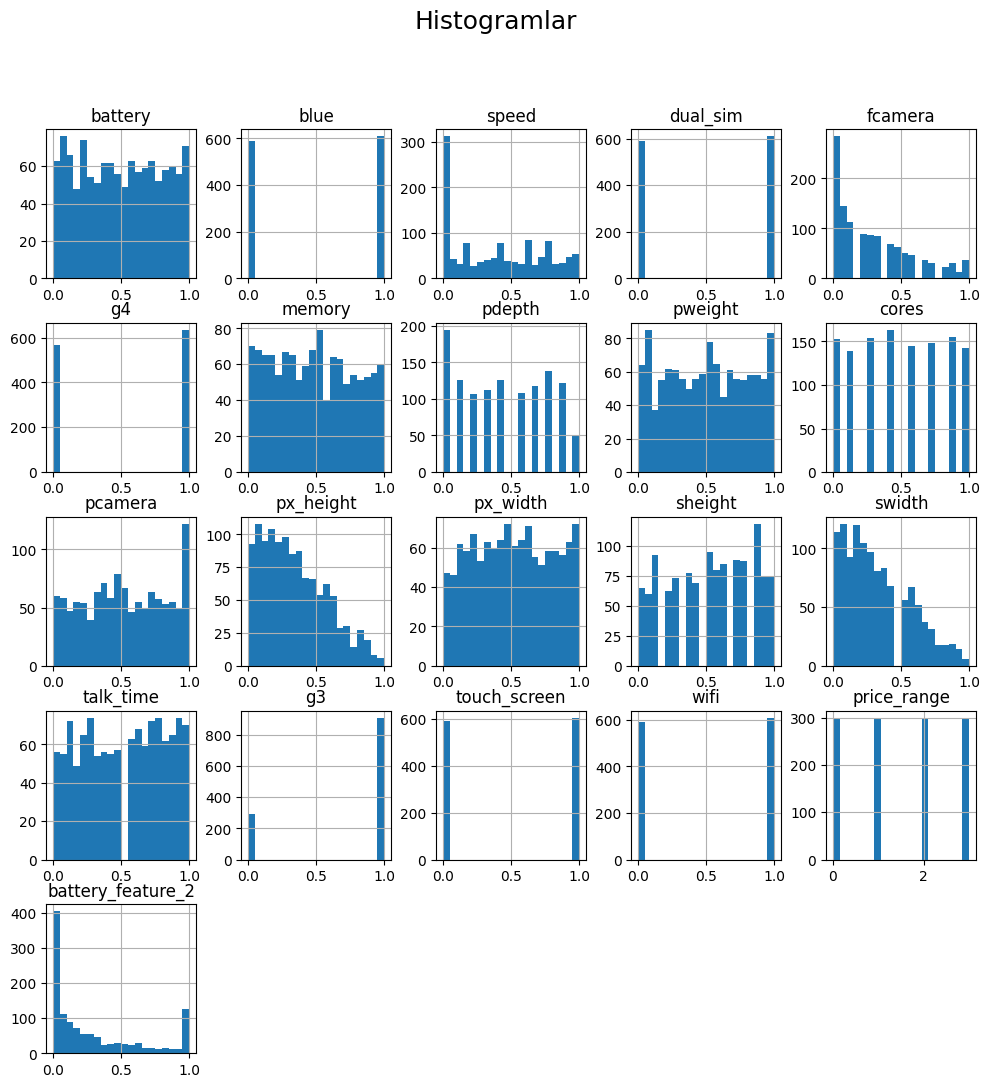

In [1386]:
df.hist(bins=20,figsize=(12,12))
plt.suptitle("Histogramlar",size=18)
plt.show()

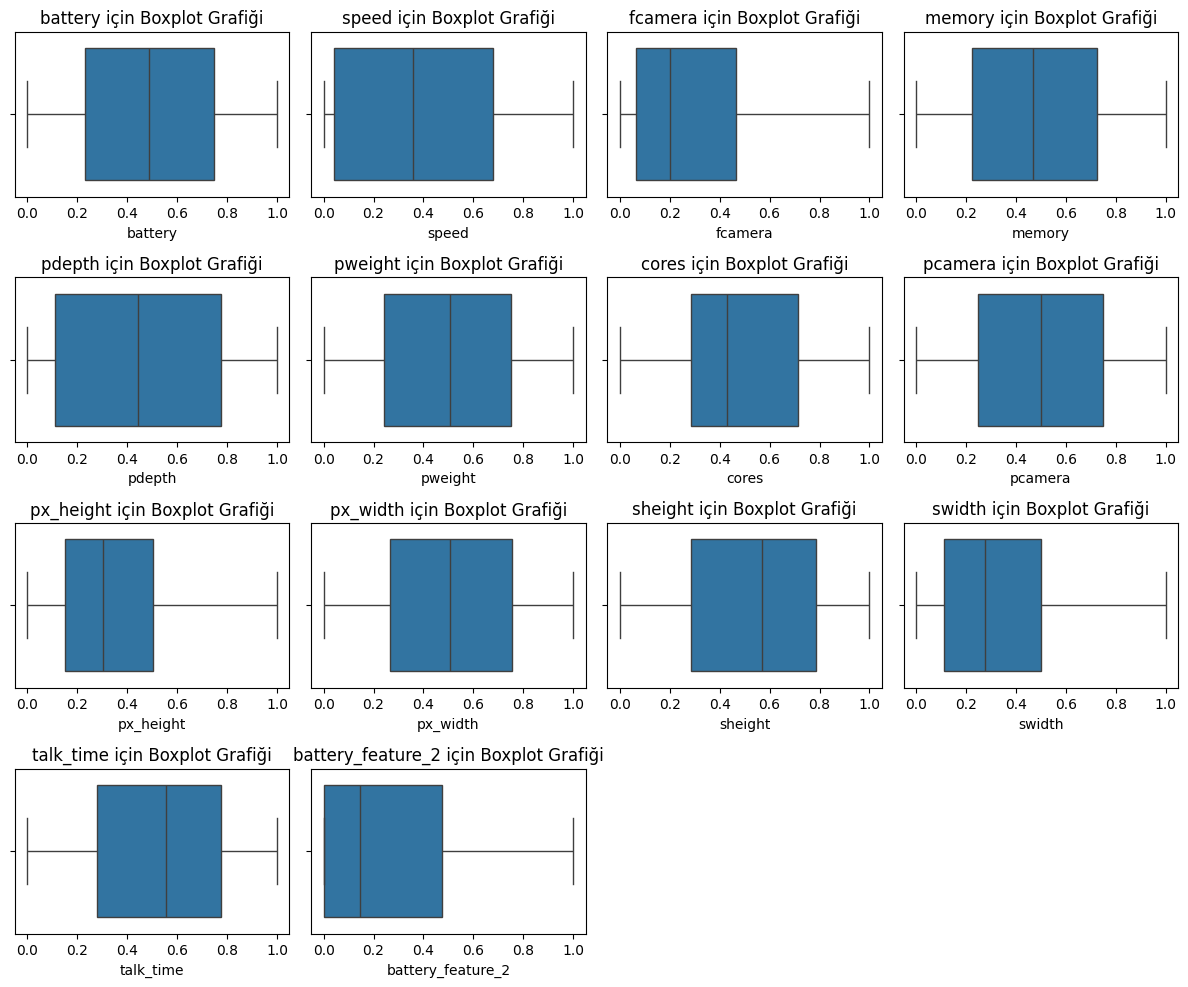

In [1127]:
plt.figure(figsize=(12, 12))  
continuous_features = ['battery', 'speed', 'fcamera', 'memory', 'pdepth', 'pweight', 
                       'cores', 'pcamera', 'px_height', 'px_width', 'sheight', 'swidth', 'talk_time',"battery_feature_2"] 
# 
for i, column in enumerate(continuous_features, 1):  
    plt.subplot(5, 4, i)  
    sns.boxplot(data=df, x=column)  
    plt.title(f"{column} için Boxplot Grafiği")  

plt.tight_layout()  
plt.show()  

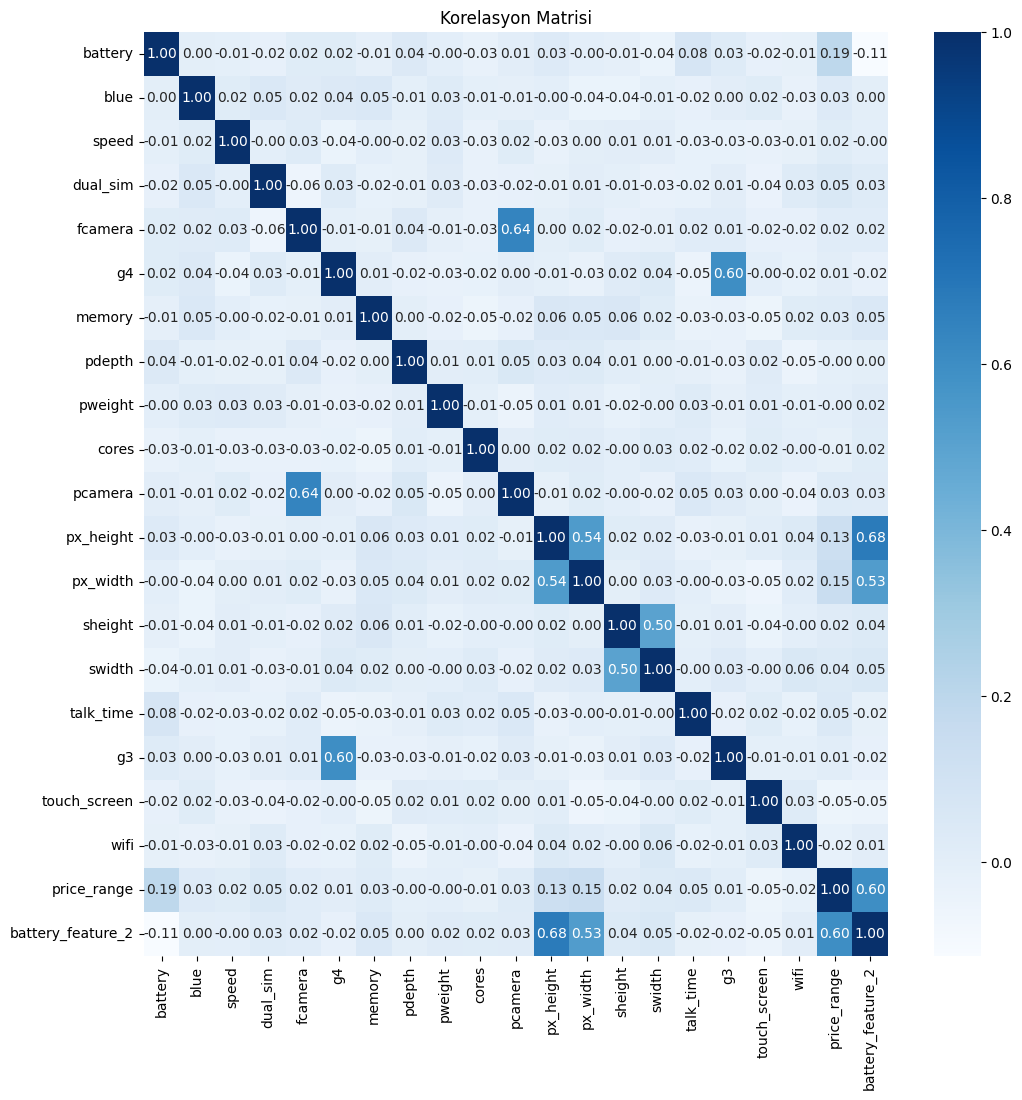

In [1129]:
plt.figure(figsize=(12, 12)) 
correlation_matrix = df.select_dtypes(include=["number"]).corr()

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


In [1418]:
# Veriyi ve hedefi ayırma
x = df.drop(columns=["price_range"])
y = df["price_range"]

In [1420]:
# Hedef değişkeni kategorik hale getirme
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

In [1422]:
# Veriyi eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [1424]:
# Veriyi standartlaştırma
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)       

In [1426]:
# Modelin tanımlanması
model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1],)))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='elu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='elu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])


In [1428]:
# Modeli eğitme
history = model.fit(x_train, y_train, 
                    epochs=50,  
                    batch_size=4,  
                    validation_data=(x_test, y_test))

# Modelin özetini yazdırma
model.summary()

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - categorical_accuracy: 0.3022 - loss: 1.3654 - val_categorical_accuracy: 0.4767 - val_loss: 1.1563
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.4781 - loss: 1.0984 - val_categorical_accuracy: 0.5333 - val_loss: 0.9689
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.5827 - loss: 0.9039 - val_categorical_accuracy: 0.6667 - val_loss: 0.8427
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.5929 - loss: 0.8868 - val_categorical_accuracy: 0.6833 - val_loss: 0.8130
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.6434 - loss: 0.8410 - val_categorical_accuracy: 0.6900 - val_loss: 0.7301
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.6835 - loss: 0.7443 - val_categorical_accuracy: 0.6467 - val_loss: 0.7455
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.6933 - los

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_147 (Dense)                    │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,470 (154.18 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,314 (102.79 KB)

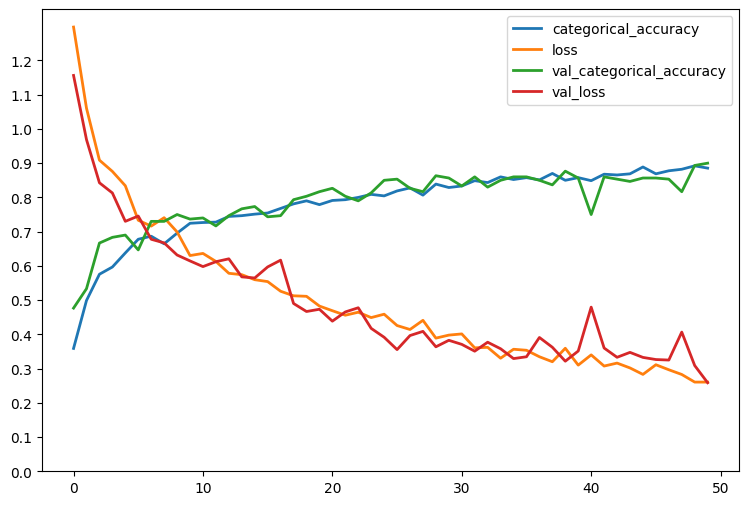

In [1430]:
pd.DataFrame(history.history).plot(figsize=(9, 6), linewidth=2)
plt.yticks(np.arange(0, 1.3, 0.1))
plt.show()

In [1432]:
# Tahminleri yapma
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [1434]:
# Sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.91      0.95      0.93        74
           2       0.82      0.87      0.85        70
           3       0.93      0.80      0.86        82

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



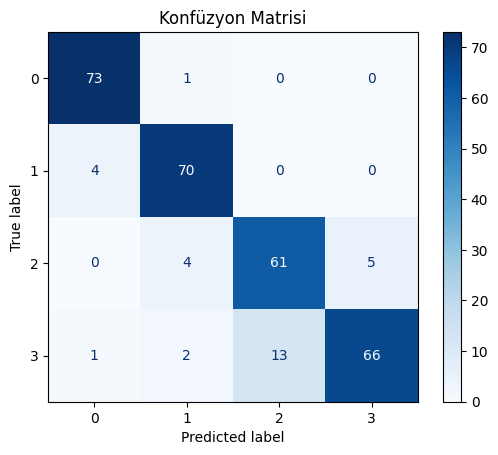

In [1436]:
# Konfüzyon matrisi
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap='Blues', values_format='d')
plt.title("Konfüzyon Matrisi")
plt.show()

In [1438]:
import pickle
model_filename = 'model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model '{model_filename}' olarak kaydedildi.")


Model 'model.pkl' olarak kaydedildi.
